<a href="https://colab.research.google.com/github/KevinEnriquez96/Proyecto-de-titulacion/blob/main/filtrosSe%C3%B1alesEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler


## **Señales EEG sin filtrar**

In [12]:
df=pd.read_csv('RecopilacionDatosEEG.csv')

df.head(12002)

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
0,53,59679,33171,5903,22574,5768,15979,6092,8450
1,54,27242,59829,36221,6567,27047,28193,11273,7100
2,61,52717,26400,32342,3796,14861,10422,5335,7559
3,78,21978,19052,5960,4705,34741,19105,11767,8274
4,78,4625,19903,8212,14641,15605,9930,5125,3771
...,...,...,...,...,...,...,...,...,...
11995,44,52576,39368,4928,7236,14643,12549,7406,9850
11996,34,18613,26862,13098,20759,16604,28543,30717,35338
11997,43,6024,53207,18869,19260,44686,48408,20759,19311
11998,38,47047,59469,2087,13050,37229,22036,31130,14225


In [14]:
x1 = df.values
xv = x1.reshape(12000,9)
df1 = pd.DataFrame(xv)


## **Gráfica de señales**

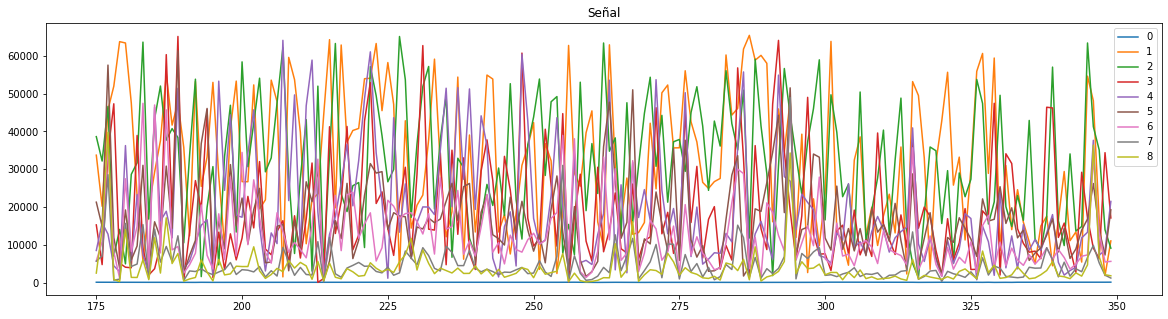

In [16]:
df1[175:350].plot(figsize=(20,5))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

## **Análisis de datos**

In [17]:
signal1=df['atencion']
signal2=df['delta']
signal3=df['theta ']
signal4=df['low alp']
signal5=df['high alp ']
signal6=df['low bet']
signal7=df['high bet']
signal8=df['low gamm']
signal9=df['min gamm ']


df1=df.drop(['delta','theta ','low alp','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df2=df.drop(['atencion','theta ','low alp','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df3=df.drop(['atencion','delta','low alp','high alp ','low bet','high bet','low gamm','min gamm ' ],axis=1)
df4=df.drop(['atencion','delta','theta ','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df5=df.drop(['atencion','delta','theta ','low alp','low bet','high bet','low gamm','min gamm ' ],axis=1)
df6=df.drop(['atencion','delta','theta ','low alp','high alp ','high bet','low gamm','min gamm ' ],axis=1)
df7=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','low gamm','min gamm '],axis=1)
df8=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','high bet','min gamm '],axis=1)
df9=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','high bet','low gamm'],axis=1)

In [18]:
df[:500].describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,59.834000,30001.138000,28597.618000,17887.996000,16739.680000,15203.15000,11072.334000,4227.316000,3275.720000
std,21.124368,18162.534203,16965.365735,13734.858231,13663.118482,10385.78338,8054.521618,4007.919819,3812.664893
min,1.000000,57.000000,1002.000000,41.000000,381.000000,127.00000,139.000000,98.000000,26.000000
25%,47.000000,13380.750000,14049.750000,7498.250000,7238.750000,7748.75000,5797.750000,1990.000000,1397.500000
50%,63.000000,28514.000000,26981.000000,13866.000000,12482.500000,13651.50000,9078.000000,3155.500000,2334.000000
75%,77.000000,44481.250000,41940.250000,24133.750000,21214.750000,19631.00000,13931.250000,5191.250000,3858.250000
max,97.000000,65529.000000,65421.000000,65098.000000,64406.000000,61305.00000,47410.000000,48927.000000,39739.000000


## **Graficas de señales sin filtrar**

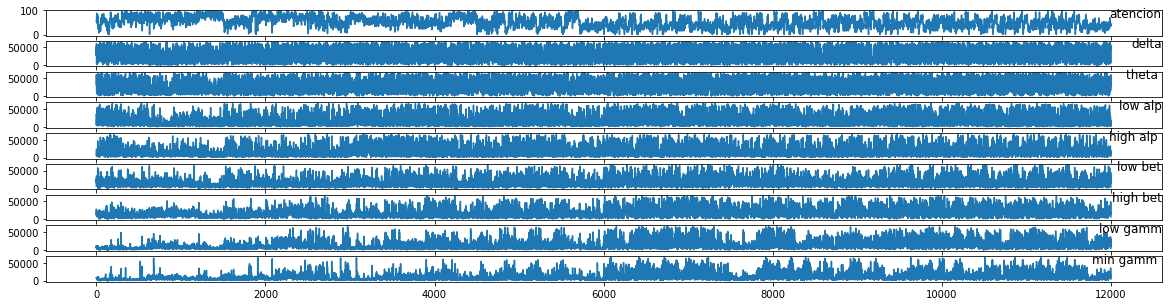

In [19]:
groups = [0,1,2,3,4,5,6,7,8]
i = 1
# plot each column
plt.figure(figsize=(20,5))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

## **Filtro - Media movil**

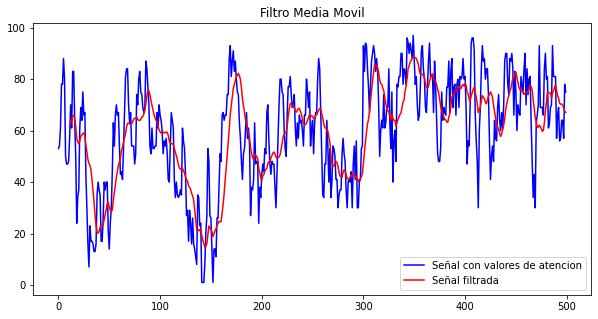

In [20]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
moving_avg5 = pd.Series(signal5).rolling(window=12).mean()
moving_avg6 = pd.Series(signal6).rolling(window=12).mean()
moving_avg7 = pd.Series(signal4).rolling(window=12).mean()
moving_avg8 = pd.Series(signal5).rolling(window=12).mean()
moving_avg9 = pd.Series(signal6).rolling(window=12).mean()

signal1[:500].plot(figsize=(10,5),label='Señal con valores de atencion',color='blue')
moving_avg1[:500].plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')



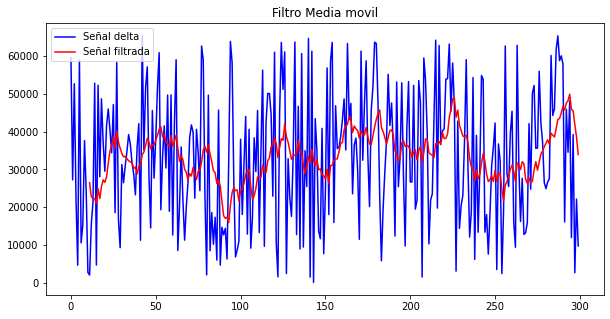

In [ ]:
signal2[:500].plot(figsize=(10,5),label='Señal delta',color='blue')
moving_avg2[:500].plot(label='Señal filtrada',color='red')
plt.title('Filtro Media movil')
plt.legend(loc='best')

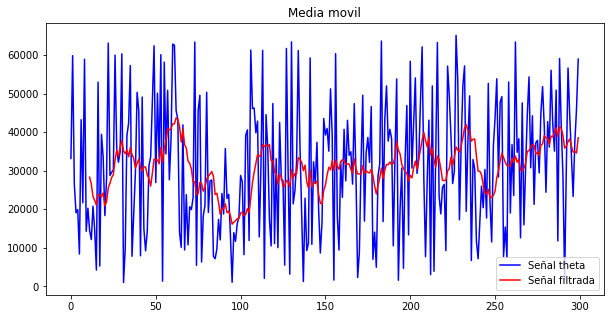

In [ ]:
signal3[:500].plot(figsize=(10,5),label='Señal theta',color='blue')
moving_avg3[:500].plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

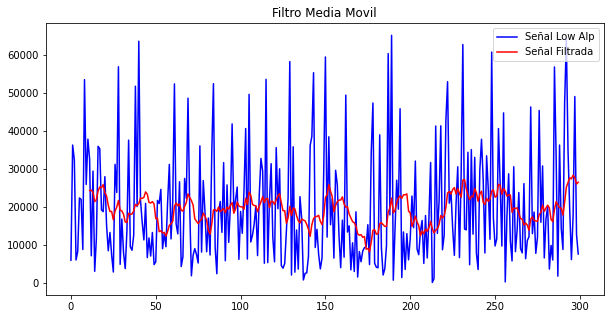

In [ ]:
signal4[:500].plot(figsize=(10,5),label='Señal Low Alp',color='blue')
moving_avg4[:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')


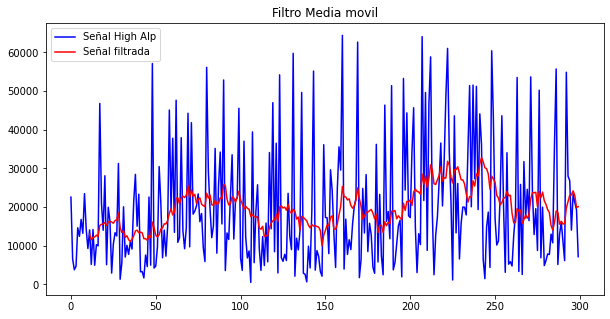

In [ ]:
signal5[:500].plot(figsize=(10,5),label='Señal High Alp',color='blue')
moving_avg5.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media movil')
plt.legend(loc='best')

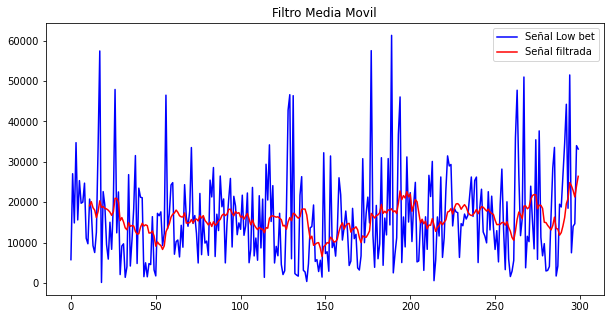

In [ ]:

signal6[:500].plot(figsize=(10,5),label='Señal Low bet',color='blue')
moving_avg6.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

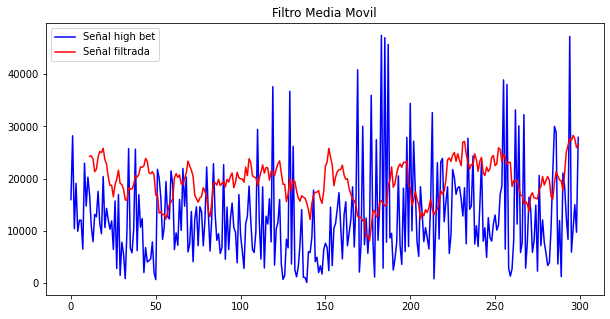

In [ ]:
signal7[:500].plot(figsize=(10,5),label='Señal high bet',color='blue')
moving_avg7.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

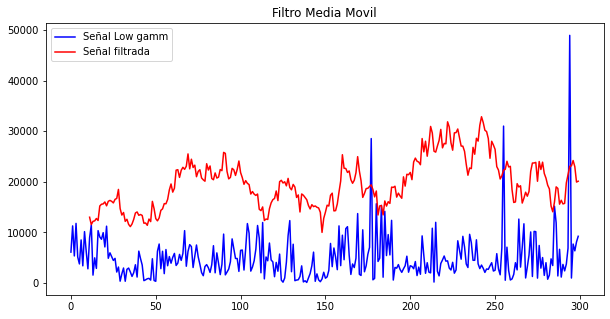

In [ ]:
signal8[:500].plot(figsize=(10,5),label='Señal Low gamm',color='blue')
moving_avg8.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

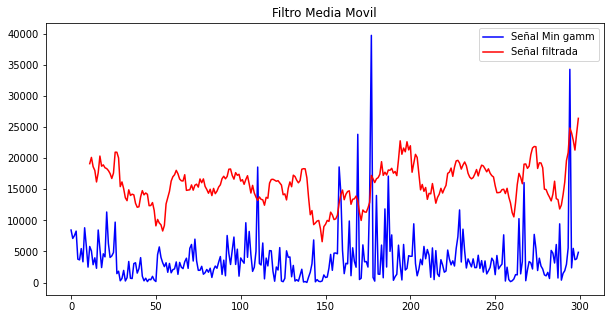

In [ ]:
signal9[:500].plot(figsize=(10,5),label='Señal Min gamm',color='blue')
moving_avg9.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')


## **Impresion de resultados con las señales filtradas con el filtro media movil**

In [21]:
df5=pd.DataFrame()
df5['atencion']=moving_avg1
df5['delta']=moving_avg2
df5['theta']=moving_avg3
df5['low alp']=moving_avg4
df5['high alp ']=moving_avg5
df5['low bet']=moving_avg6
df5['high bet']=moving_avg7
df5['low gamm']=moving_avg8
df5['min gamm']=moving_avg9
df5[30:50].head()
#Genera una matrix nueva con los datos de la media, desviacion estandar
df5.to_csv('MediaMovil1.csv')
df5.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000,11989.000000
mean,51.677892,29524.439507,28340.448182,18994.777595,17819.727695,16326.169266,18994.777595,17819.727695,16326.169266
std,17.071579,6860.501215,6458.833611,6527.992911,6094.233961,5149.110099,6527.992911,6094.233961,5149.110099
min,8.583333,5217.250000,8398.083333,3994.500000,4233.750000,4067.500000,3994.500000,4233.750000,4067.500000
25%,39.083333,25175.916667,23872.666667,14019.083333,13121.666667,12594.833333,14019.083333,13121.666667,12594.833333
50%,50.833333,29593.000000,28439.750000,18356.416667,17118.416667,15692.333333,18356.416667,17118.416667,15692.333333
75%,64.666667,34336.583333,32826.500000,23420.416667,21944.250000,19527.166667,23420.416667,21944.250000,19527.166667
max,90.833333,51330.083333,53841.000000,39409.750000,40054.333333,41830.000000,39409.750000,40054.333333,41830.000000


## **Filtro - Savitzky golay**

In [32]:

from scipy.signal import savgol_filter
np.set_printoptions(precision=2) 

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['delta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['theta ']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['low alp']=SG4
SG5=savgol_filter(signal5, 21, 3)
df5['high alp ']=SG5
SG6=savgol_filter(signal6, 21, 3)
df6['low bet']=SG6
SG7=savgol_filter(signal7, 21, 3)
df7['high bet']=SG7
SG8=savgol_filter(signal8, 21, 3)
df8['low gamm']=SG8
SG9=savgol_filter(signal9, 21, 3)
df9['min gamm']=SG9






## **Graficas del filtro Savitzky-Golay**

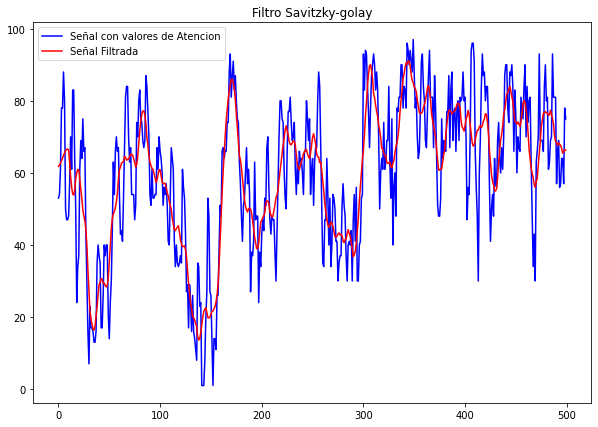

In [33]:

signal1[:500].plot(figsize=(10,7),label='Señal con valores de Atencion',color='blue')
df1['atencion'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

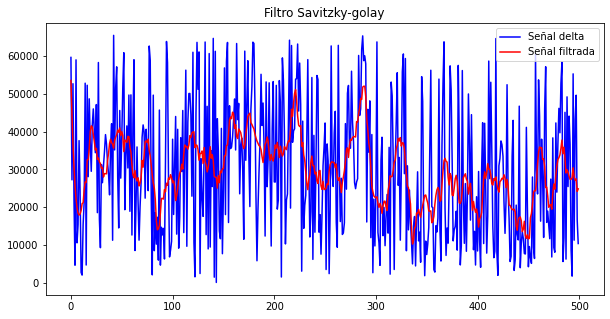

In [36]:
signal2[:500].plot(figsize=(10,5),label='Señal delta',color='blue')
df2['delta'][:500].plot(label='Señal filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')


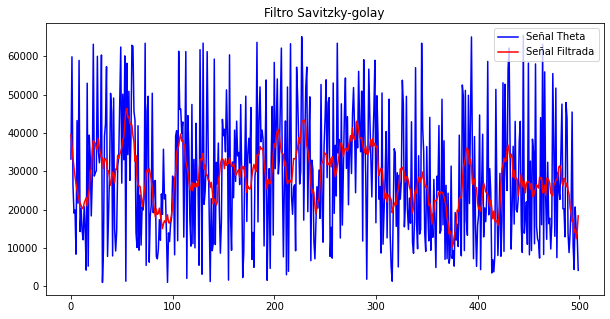

In [37]:

signal3[:500].plot(figsize=(10,5),label='Señal Theta',color='blue')
df3['theta '][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

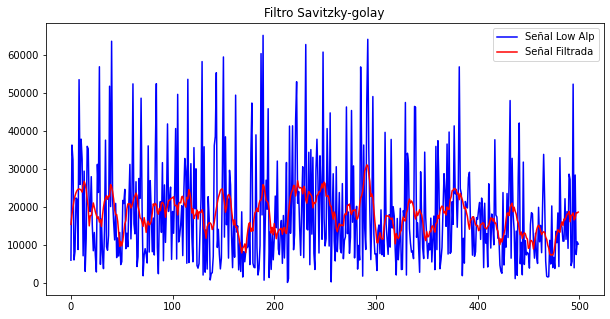

In [38]:

signal4[:500].plot(figsize=(10,5),label='Señal Low Alp',color='blue')
df4['low alp'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

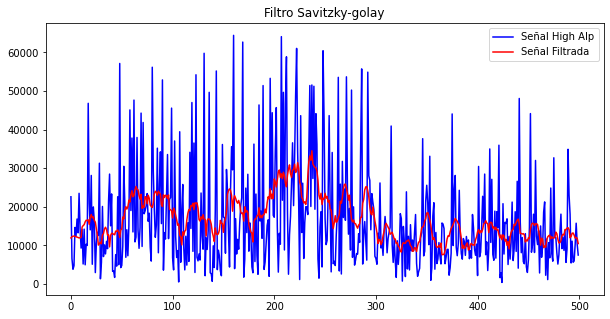

In [40]:

signal5[:500].plot(figsize=(10,5),label='Señal High Alp',color='blue')
df5['high alp '][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

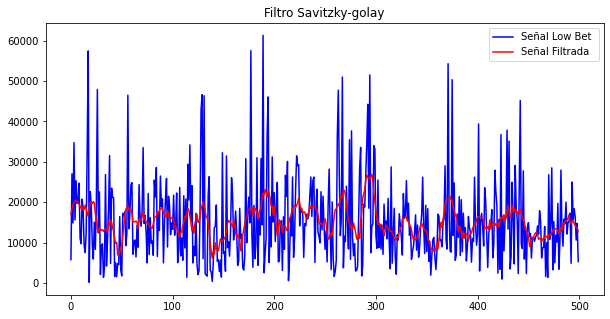

In [41]:
signal6[:500].plot(figsize=((10,5)),label='Señal Low Bet ',color='blue')
df6['low bet'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

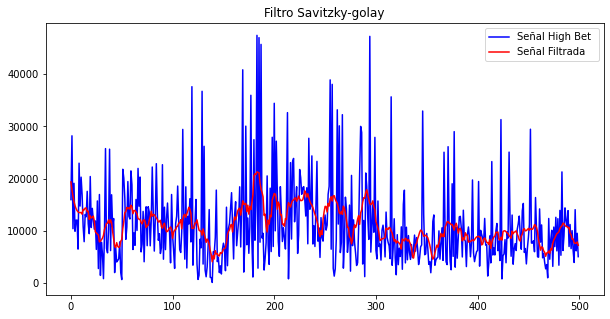

In [42]:
signal7[:500].plot(figsize=((10,5)),label='Señal High Bet ',color='blue')
df7['high bet'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

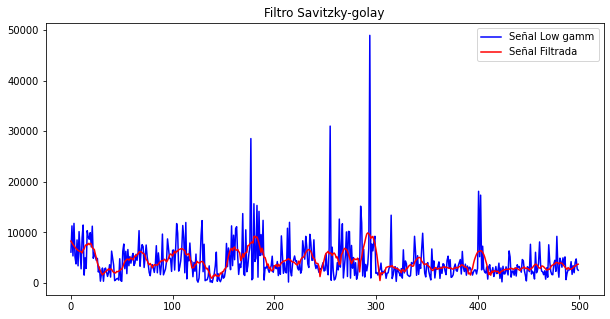

In [43]:
signal8[:500].plot(figsize=((10,5)),label='Señal Low gamm',color='blue')
df8['low gamm'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

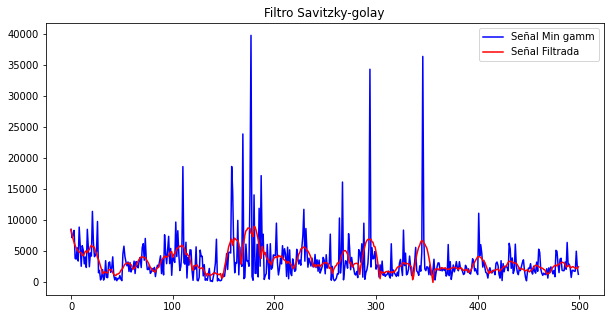

In [44]:
signal9[:500].plot(figsize=((10,5)),label='Señal Min gamm',color='blue')
df9['min gamm'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

## **Impresion de resultados con las señales filtradas con el filtro Savitzky Golay**

In [45]:

df5=pd.DataFrame()
df5['atencion']=SG1
df5['delta']=SG2
df5['theta']=SG3
df5['low alp']=SG4
df5['high alp']=SG5
df5['low bet']=SG6
df5['high bet']=SG7
df5['low gamm']=SG8
df5['min gamm']=SG9
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('DatosFiltrado.csv')
df5.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,51.680587,29530.380524,28345.046209,18991.682103,17816.169532,16330.747022,17714.402921,14157.112222,11485.864147
std,17.998497,7518.167609,6986.539064,7007.528526,6530.572820,5569.625535,6054.760333,6836.161035,6218.173453
min,5.413534,2748.807127,7704.582216,1708.842432,2511.935273,2636.036940,2594.747957,470.715920,-1930.819876
25%,38.221151,24662.320775,23501.239948,13714.911981,12791.982347,12243.579111,13235.124796,8725.440340,6495.420154
50%,51.270350,29451.029421,28377.294704,18314.298790,17087.493952,15647.553939,17347.702517,13391.907976,10682.908140
75%,65.383459,34725.678980,33185.699412,23686.663781,22096.471396,19664.359268,21825.662063,19318.186989,15542.363312
max,93.409611,53572.533409,55320.371690,41940.967963,41142.433148,43733.226545,41961.352076,39279.870546,35315.417457


## **Filtro** FIR

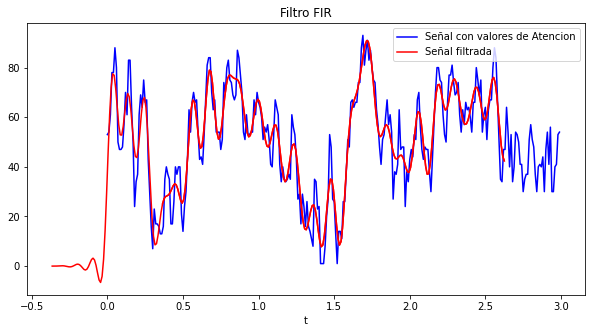

In [ ]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Crear un filtro FIR y aplicarlo a x.
#------------------------------------------------
# La tasa de Nyquist de la señal.
nyq_rate = sample_rate / 2.0

# La anchura deseada de la transición de paso a parada,
# relativa a la tasa de Nyquist.  Diseñaremos el filtro
# con un ancho de transición de 5 Hz.
width = 5.0/nyq_rate
# La atenuación deseada en la banda de parada, en dB.
ripple_db = 60.0
# Calcula el orden y el parámetro Kaiser para el filtro FIR
N, beta = kaiserord(ripple_db, width)
# La frecuencia de corte del filtro.
cutoff_hz = 10.0
# Utiliza firwin con una ventana Kaiser para crear un filtro FIR de paso bajo.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Usa lfilter para filtrar x con el filtro FIR.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Traza las señales original y filtrada.
#------------------------------------------------
filtered_x =filtered_x 
# El retardo de fase de la señal filtrada.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(10,5))
# Traza la señal original.
plot(t, signal1[:300],color='blue')
# Traza la señal filtrada, desplazada para compensar el retardo de fase.
plot(t-delay, filtered_x[:300],color='red')
# Traza sólo la parte "buena" de la señal filtrada.  Las primeras N-1
# están "corrompidas" por las condiciones iniciales.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal con valores de Atencion', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()


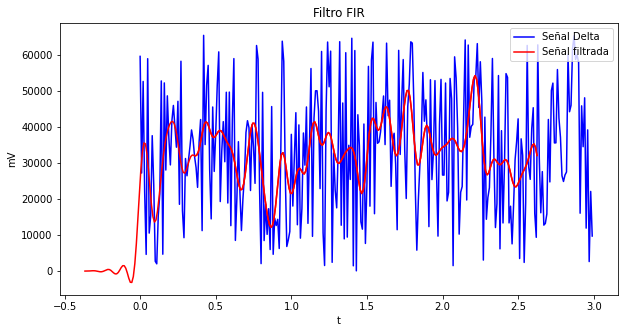

In [ ]:

filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal2[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Delta', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

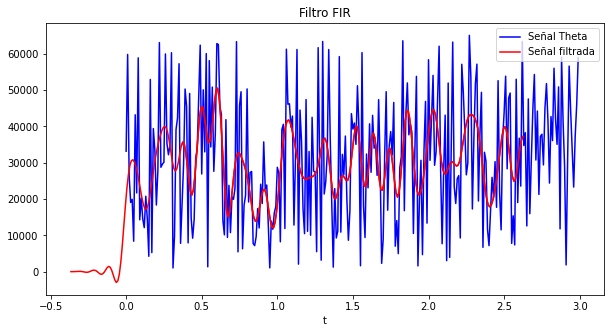

In [ ]:

filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal3[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Theta', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

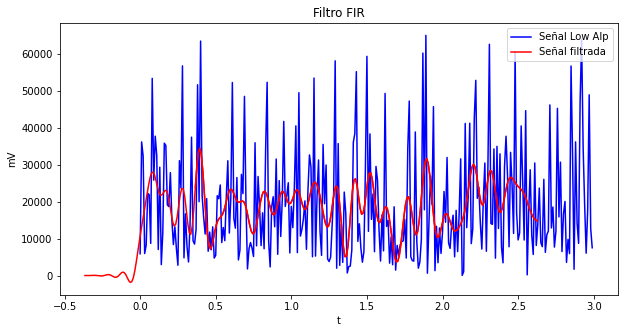

In [ ]:

filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal4[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low Alp', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

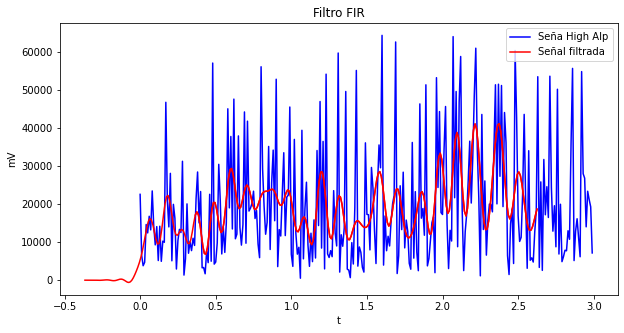

In [ ]:

filtered_x = lfilter(taps, 1.0, signal5)
df5['FIR5']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal5[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Seña High Alp', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

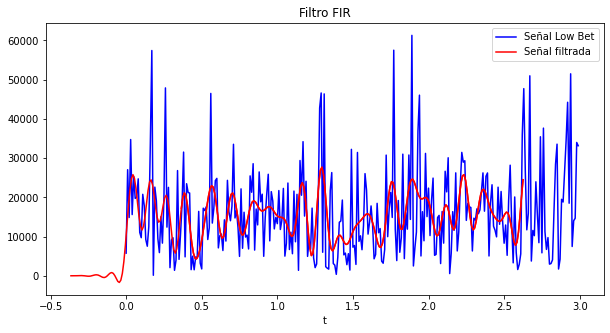

In [ ]:

filtered_x = lfilter(taps, 1.0, signal6)
df6['FIR6']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal6[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low Bet', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

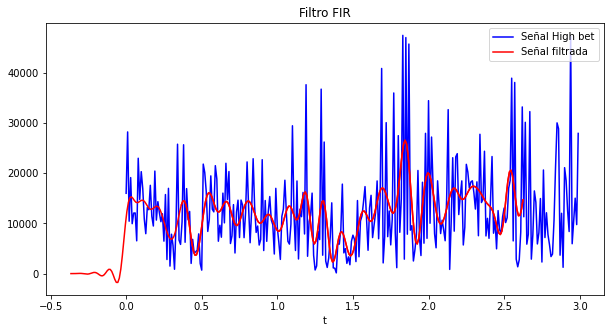

In [ ]:
filtered_x = lfilter(taps, 1.0, signal7)
df7['FIR7']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal7[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal High bet', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

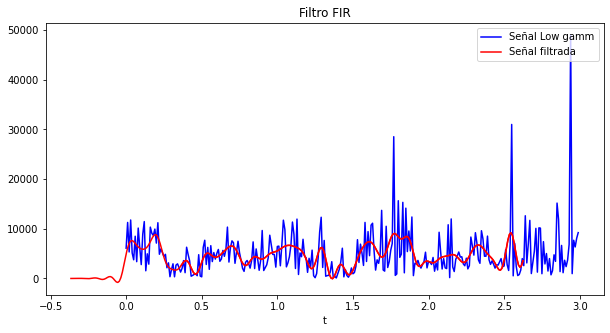

In [ ]:
filtered_x = lfilter(taps, 1.0, signal8)
df8['FIR8']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal8[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

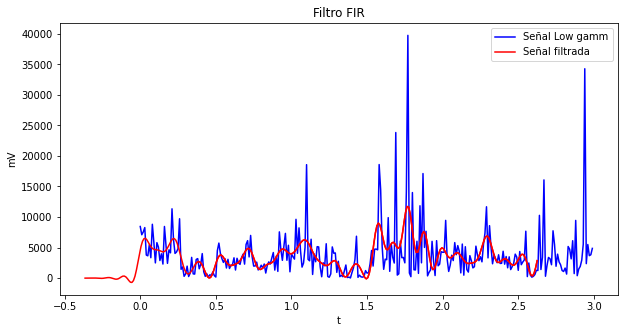

In [ ]:
filtered_x = lfilter(taps, 1.0, signal9)
df9['FIR9']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(10,5))
plot(t, signal9[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

## **Impresion de resultados con las señales filtradas con el filtro FIR**

In [ ]:
df11=pd.DataFrame()
df11['atencion']=df1['FIR1']
df11['delta']=df2['FIR2']
df11['theta']=df3['FIR3']
df11['low alp ']=df4['FIR4']
df11['high alp']=df5['FIR5']
df11['low bet']=df6['FIR6']
df11['high bet']=df7['FIR7']
df11['low gamm']=df8['FIR8']
df11['min gamm']=df9['FIR9']
df11.to_csv('FIR3.csv')
df11.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,45.479778,29176.346365,26490.322080,16865.832914,17136.249983,13666.463446,10929.501181,4140.032148,3254.875787
std,24.631161,12811.204900,12273.968257,8215.110298,9239.498962,6974.627487,5538.284014,2451.550088,2308.538847
min,-6.595381,-3171.528309,-2985.637805,-1872.340344,-599.591674,-1701.086960,-1763.154092,-801.820885,-707.802116
25%,28.615041,25696.429130,21357.170157,12981.860276,12293.525841,9938.850127,8146.676426,2473.112168,1807.133948
50%,52.085593,32246.790927,28380.110618,18319.259581,17154.583537,14650.331238,12032.842016,4328.631521,2929.196451
75%,64.109232,37276.180411,35258.181510,22531.001351,22677.993923,18676.335613,14465.869242,6012.671718,4712.662329
max,90.899049,54318.650401,50518.353992,34509.537810,41154.010495,27684.787471,26537.666033,9209.975232,11718.197061
